# Libraries

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Data

In [6]:
# Load data
df = pd.read_csv('alberta_monthly_area_burned.csv')

# Output first 5 rows of dataset
df.head()

,DATE,AREA_BURNED_HA,LOG_AREA_BURNED_HA
0,1959-04,317.41,2.502987
1,1959-05,7515.69,3.876027
2,1959-06,0.00,0.000000
3,1959-07,15220.63,4.182461
4,1959-08,0.00,0.000000


In [7]:
# Convert the 'DATE' column to a datetime format
df['DATE'] = pd.to_datetime(df['DATE'],
                            format='%Y-%m')

# Output first 5 rows of dataset
df.head(5)

,DATE,AREA_BURNED_HA,LOG_AREA_BURNED_HA
0,1959-04-01,317.41,2.502987
1,1959-05-01,7515.69,3.876027
2,1959-06-01,0.00,0.000000
3,1959-07-01,15220.63,4.182461
4,1959-08-01,0.00,0.000000


# Exploratory Analysis

## Time Series

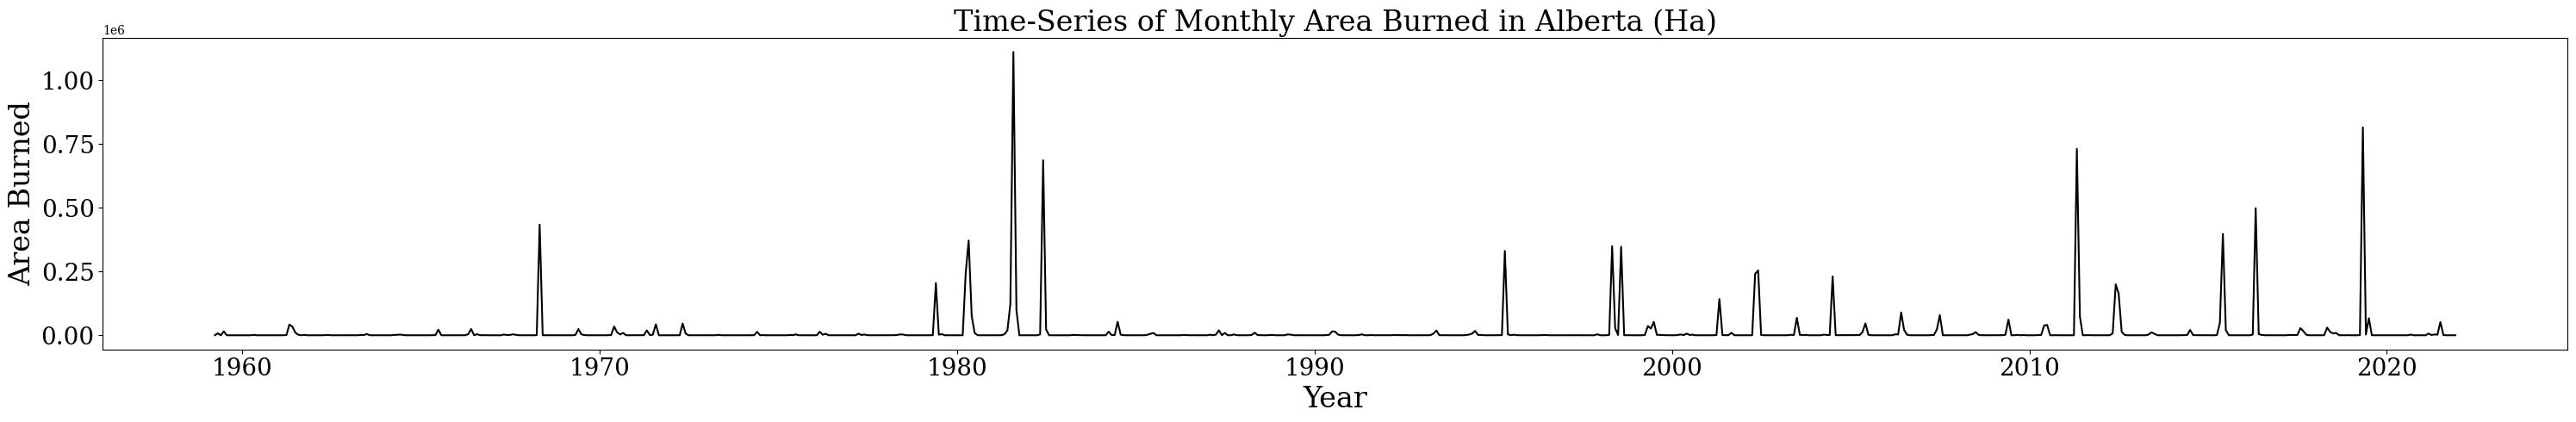

In [9]:
# Change figure size
plt.figure(figsize=(30, 5))

# Set font style
plt.rc('font', family='serif')

# Plot time series of monthly area burned in Alberta
plt.plot(df['DATE'], df['AREA_BURNED_HA'],
         color='k')

# Add title and axis names
plt.title("Time-Series of Monthly Area Burned in Alberta (Ha)", fontsize=24)
plt.xlabel('Year', fontsize=24)
plt.ylabel('Area Burned', fontsize=24)

# Increase axis tick label size
plt.tick_params(axis='both', labelsize=20)

# Automatically adjust spacing in plot
plt.tight_layout()

# Show plot
plt.show()

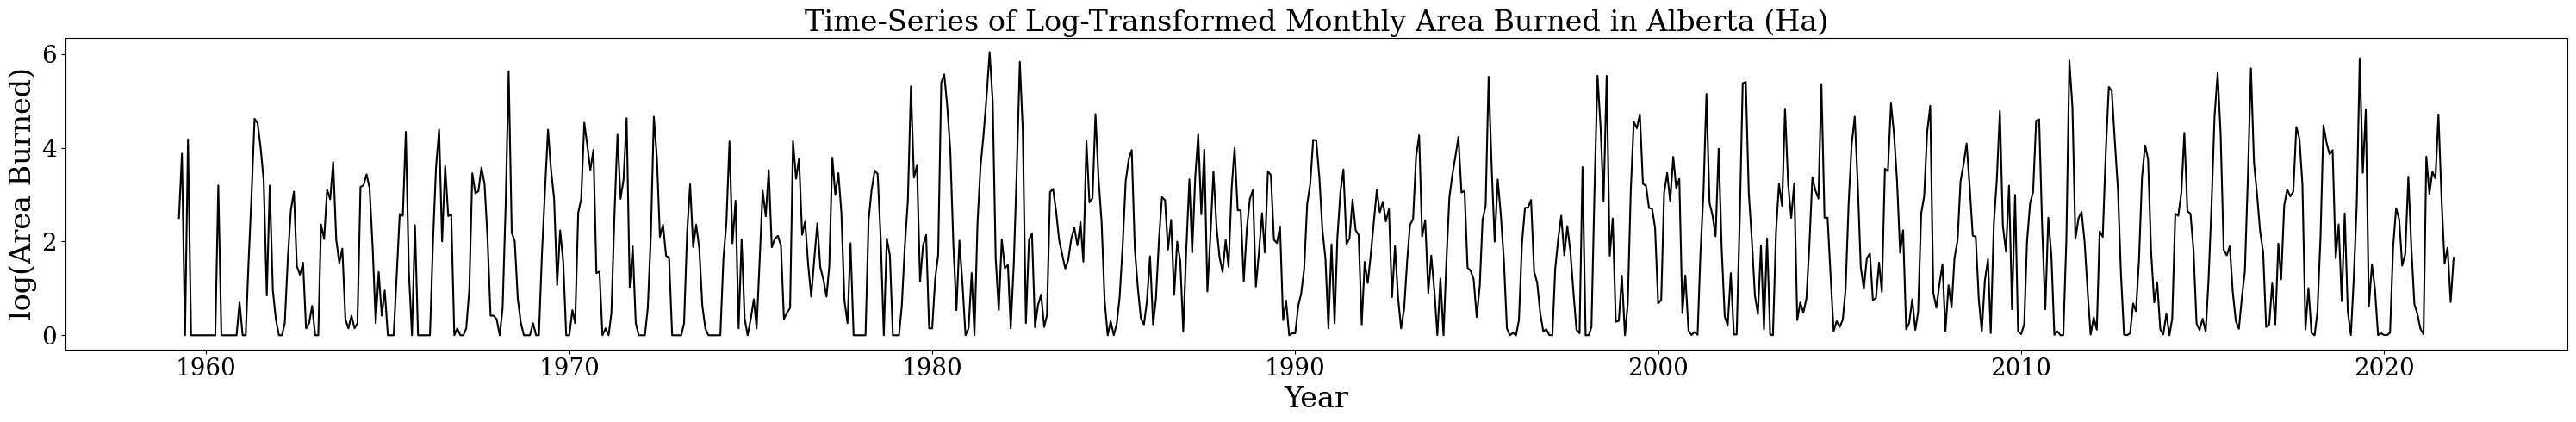

In [10]:
# Change figure size
plt.figure(figsize=(30, 5))

# Set font style
plt.rc('font', family='serif')

# Plot time series of log-transformed monthly area burned in Alberta
plt.plot(df['DATE'], df['LOG_AREA_BURNED_HA'],
         color='k')

# Add title and axis names
plt.title("Time-Series of Log-Transformed Monthly Area Burned in Alberta (Ha)", fontsize=24)
plt.xlabel('Year', fontsize=24)
plt.ylabel('log(Area Burned)', fontsize=24)

# Increase axis tick label size
plt.tick_params(axis='both', labelsize=20)

# Automatically adjust spacing in plot
plt.tight_layout()

# Show plot
plt.show()

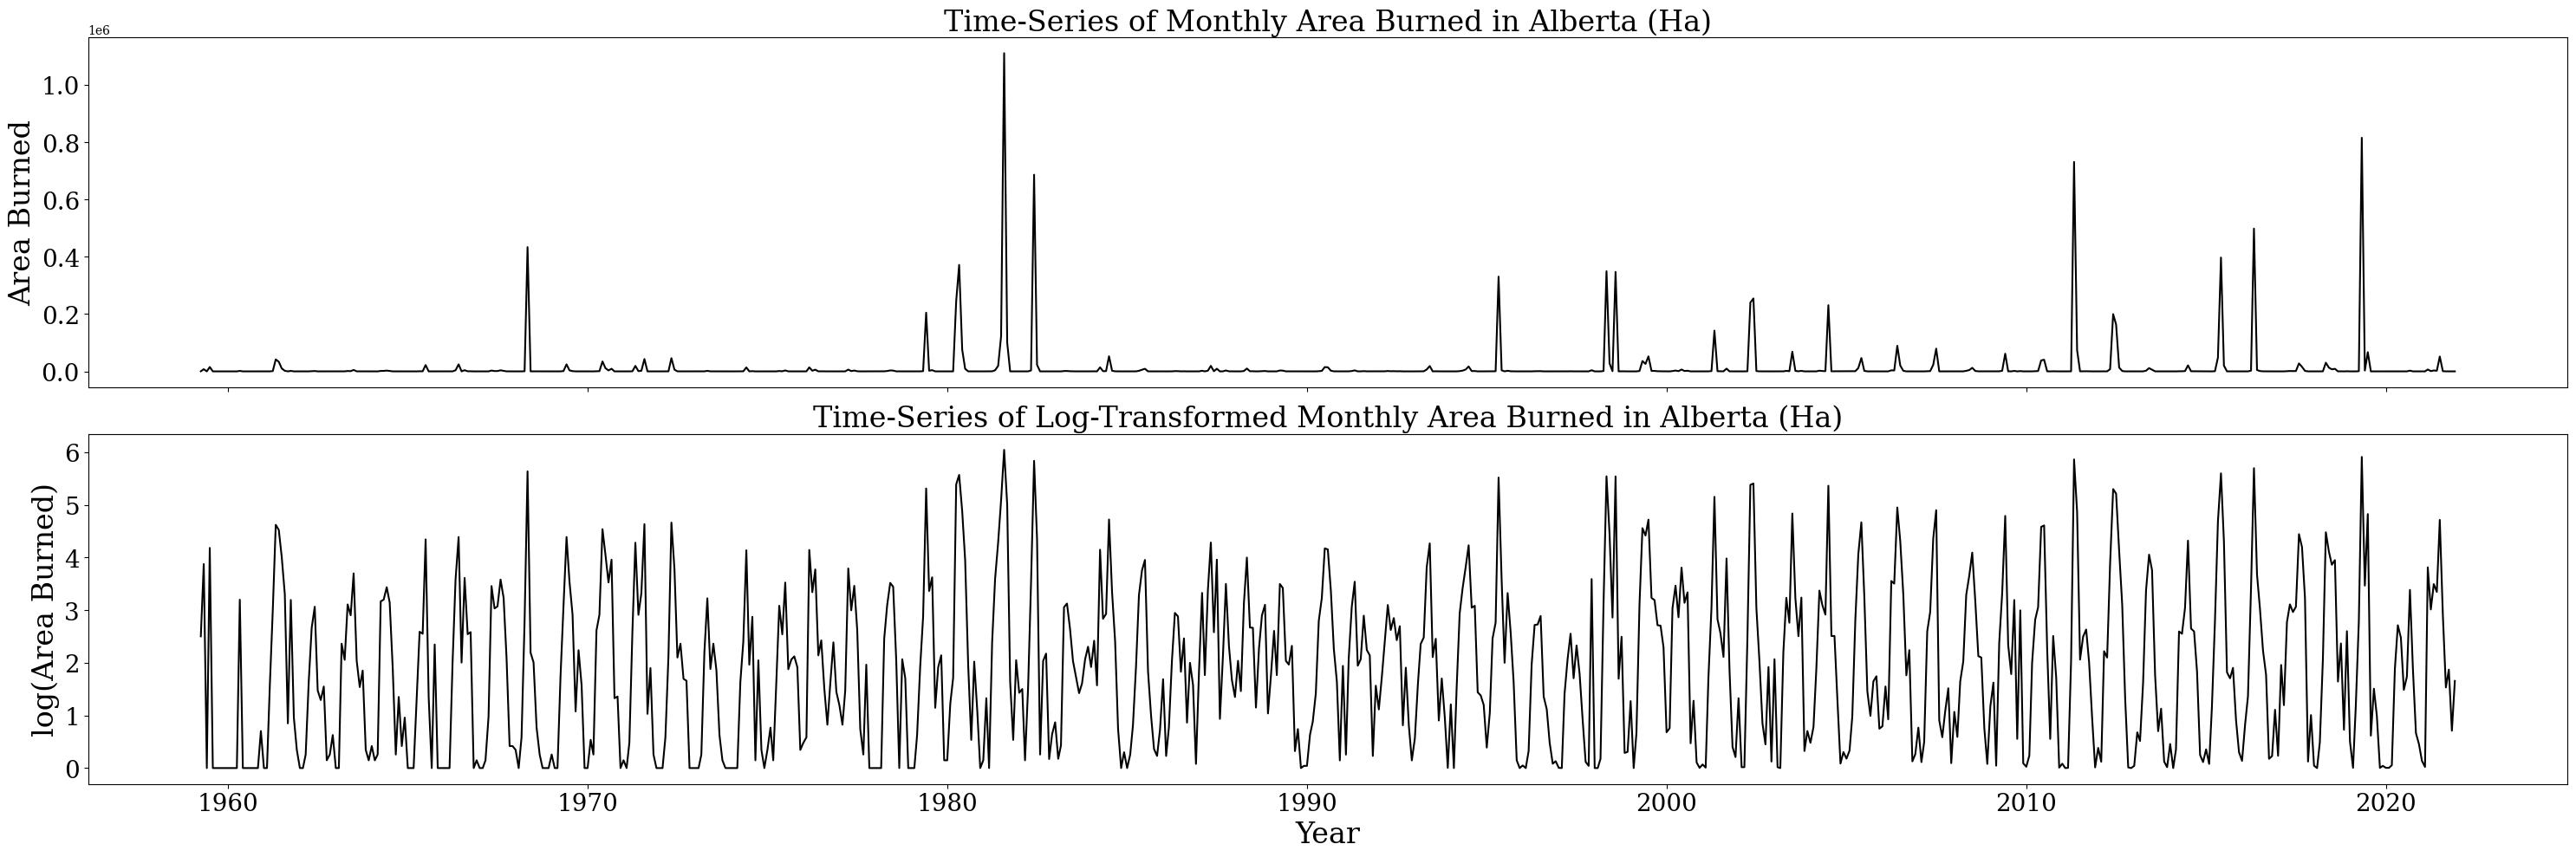

In [12]:
# Create subplots with 2 rows and 1 column, sharing the x-axis
fig, axs = plt.subplots(2, 1, figsize=(30, 10), sharex=True)

# Set font style 
plt.rc('font', family='serif')

# Plot the non-log-transformed monthly area burned in Alberta in the first subplot
axs[0].plot(df['DATE'], df['AREA_BURNED_HA'], color='k')
axs[0].set_title("Time-Series of Monthly Area Burned in Alberta (Ha)", fontsize=24)
axs[0].set_ylabel('Area Burned', fontsize=24)
axs[0].tick_params(axis='both', labelsize=20)

# Plot the log-transformed monthly area burned in Alberta in the second subplot
axs[1].plot(df['DATE'], df['LOG_AREA_BURNED_HA'], color='k')
axs[1].set_title("Time-Series of Log-Transformed Monthly Area Burned in Alberta (Ha)", fontsize=24)
axs[1].set_xlabel('Year', fontsize=24)
axs[1].set_ylabel('log(Area Burned)', fontsize=24)
axs[1].tick_params(axis='both', labelsize=20)

# Automatically adjust spacing in plot
plt.tight_layout()

# Show plot
plt.show()

## Summary Statistics

In [15]:
# Output the largest amount of area burned in month
print('Largest amount of area burned in month:', round(df['AREA_BURNED_HA'].max(), 2))

# Output largest area burned in month by wildfire logged 
print('Largest amount of area burned in month logged:', round(df['LOG_AREA_BURNED_HA'].max(), 2))

# Output the smallest amount of area burned 
print('Smallest amount of area burned in month:', round(df['AREA_BURNED_HA'].min(), 2))

# Output smallest area burned in month by wildfire logged 
print('Smallest amount of area burned in month logged:', round(df['LOG_AREA_BURNED_HA'].min(), 2))

Largest amount of area burned in month: 1110702.31
Largest amount of area burned in month logged: 6.05
Smallest amount of area burned in month: 0.0
Smallest amount of area burned in month logged: 0.0


## Histogram

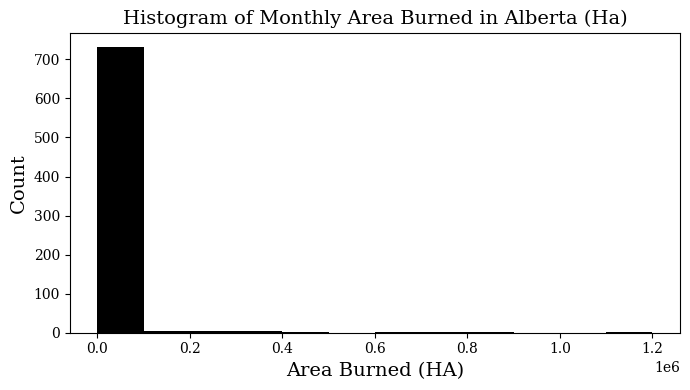

In [19]:
# Set figure size
plt.figure(figsize=(7, 4))

# Set font style
plt.rc('font', family='serif')

# Create histogram of area burned
plt.hist(df['AREA_BURNED_HA'],
         range=(0, 1200000),
         bins=12,
         color='k')

# Add title and axis names
plt.title("Histogram of Monthly Area Burned in Alberta (Ha)", fontsize=14)
plt.xlabel('Area Burned (HA)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Automatically adjust spacing in plot
plt.tight_layout()

# Show plot
plt.show()

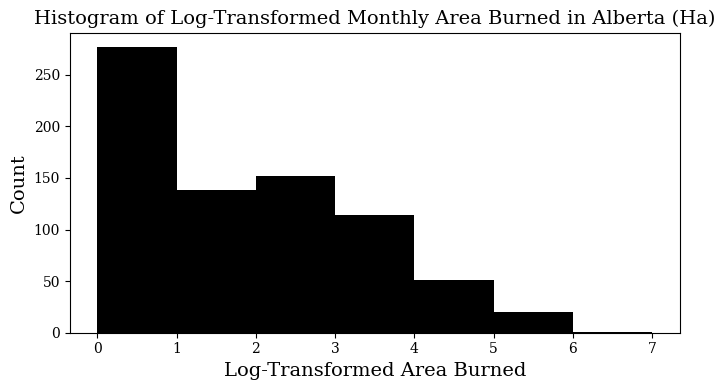

In [20]:
# Set figure size
plt.figure(figsize=(7, 4))

# Set font style
plt.rc('font', family='serif')

# Create histogram of area burned
plt.hist(df['LOG_AREA_BURNED_HA'],
         range=(0, 7),
         bins=7,
         color='k')

# Add title and axis names
plt.title("Histogram of Log-Transformed Monthly Area Burned in Alberta (Ha)", fontsize=14)
plt.xlabel('Log-Transformed Area Burned', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Automatically adjust spacing in plot
plt.tight_layout()

# Show plot
plt.show()

## QQ-Plot

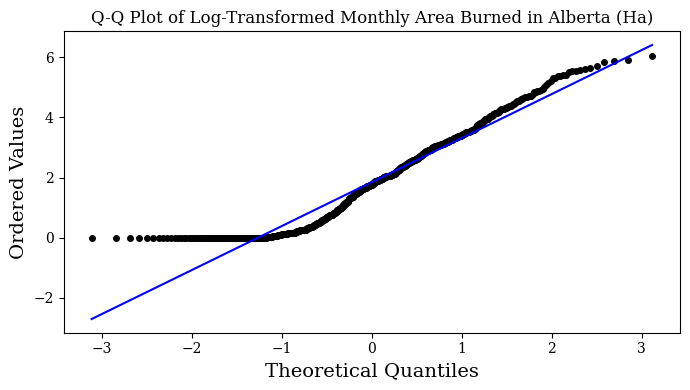

In [22]:
# Set figure size
plt.figure(figsize=(7, 4))

# Set font style
plt.rc('font', family='serif')

# Generate Q-Q plot for the log-transformed area burned data
stats.probplot(df['LOG_AREA_BURNED_HA'],
               dist="norm",
               plot=plt)

# Get current axes instance
ax = plt.gca()

# Change line and marker colours, and make markers smaller
ax.get_lines()[0].set_color('Black')
ax.get_lines()[1].set_color('Blue')
ax.get_lines()[0].set_markersize(4)

# Add title and axis names
plt.title("Q-Q Plot of Log-Transformed Monthly Area Burned in Alberta (Ha)", fontsize=12)
plt.xlabel('Theoretical Quantiles', fontsize=14)
plt.ylabel('Ordered Values', fontsize=14)

# Automatically adjust spacing in plot
plt.tight_layout()

# Show plot
plt.show()